<a href="https://colab.research.google.com/github/rachel-kim2255/Machine-Learning-Notebooks/blob/main/2_%5BLogistic_Regression%5D_Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Logistic Regression] Titanic survival prediction

### Goal
The goal of this project is to use a **logistic regression model** to analyze the Titanic dataset and predict passenger survival.  
This is a binary classification problem, where the target variable indicates whether a passenger survived or not.

Logistic regression is a classification algorithm used for problems with two possible outcomes, such as Yes/No or Survived/Not Survived.  
The model will be trained to make predictions and evaluated using appropriate classification metrics.


## **1. Data Loading and check**

In [ ]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
df = pd.read_csv(file_url)

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


### Titanic Dataset Variable Information

- survived: Survival (0 = No, 1 = Yes)
- pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex: Sex (male, female)
- age: Age in years
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- Ticket: Ticket Number

<!--

- class: Ticket class (First, Second, Third)
- who: man, woman, child
- adult_male: True if the passenger is an adult male
- deck: Cabin deck (A, B, C, D, E, F, G)
- embark_town: Embarkation town (Full name)
- alive: Survival status (yes, no)
- alone: True if the passenger is alone

- fare: Passenger fare -->

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


결측치가 없습니다.

In [ ]:
df.describe().round(2)

,Pclass,Age,SibSp,Parch,Survived
count,889.00,889.00,889.00,889.00,889.00
mean,2.31,29.32,0.52,0.38,0.38
std,0.83,12.98,1.10,0.81,0.49
min,1.00,0.42,0.00,0.00,0.00
25%,2.00,22.00,0.00,0.00,0.00
50%,3.00,28.00,0.00,0.00,0.00
75%,3.00,35.00,1.00,0.00,1.00
max,3.00,80.00,8.00,6.00,1.00


- **Age**: The 75th percentile (upper 25%) value is 35, which indicates that most passengers were relatively young.

- **SibSp, Parch**: The median (50%) value for both variables is 0, and the 75th percentile value for SibSp is also 0.  
  This suggests that most passengers traveled alone, without siblings, spouses, parents, or children.


### **2. Correlation**

In [ ]:
df.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


### Correlation

**Definition**  
Correlation is a statistical measure that describes the strength and direction of the linear relationship between two variables.

**Range**  
The correlation coefficient ranges from −1 to 1:

- **r = 1**: Perfect positive correlation. The variables increase together in a linear pattern.
- **r = −1**: Perfect negative correlation. One variable increases while the other decreases in a linear pattern.
- **r = 0**: No linear correlation between the variables.

**Strength of Correlation**

- **0.0 ~ 0.2**: No correlation. The two variables are essentially unrelated.
- **0.2 ~ 0.4**: Weak correlation. A relationship exists, but it is minimal.
- **0.4 ~ 0.7**: Moderate to strong correlation. The relationship is meaningful and worth analyzing.
- **0.7 ~ 1.0**: Very strong correlation. One variable can predict the other with high accuracy.

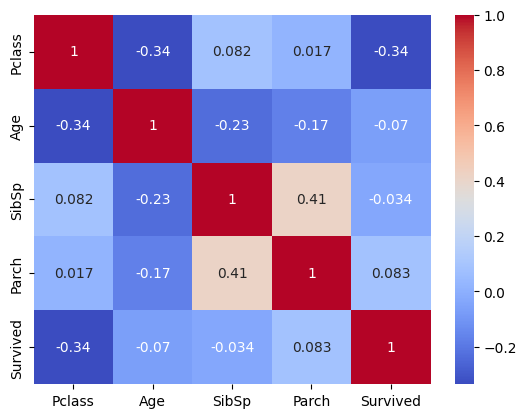

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm',annot=True)
plt.show()

- **Parch & SibSp (0.41)**: This shows a meaningful positive correlation.  
  Passengers who traveled with parents or children were also likely to travel with siblings or spouses, suggesting that family members often boarded together.

- **Pclass & Survived (−0.34)**: This pair shows the strongest negative correlation among the variables.  
  It indicates that passengers in higher classes (especially first class) had a higher probability of survival.  
  However, the strength of the correlation is moderate and not extremely strong.


### **3. Categorical Variable**

This dataset contains four variables with the `object` data type, meaning they are non-numeric and stored as strings.  
Since most machine learning algorithms cannot directly interpret string values, these variables need to be converted into numeric form.

To address this, I will transform the categorical variables into dummy variables so that they can be used effectively in the model.


In [ ]:
print('# of Name:',df['Name'].nunique())
print('# of Sex:',df['Sex'].nunique())
print('# of Ticket:',df['Ticket'].nunique())
print('# of Embarked:',df['Embarked'].nunique())

# of Name: 889
# of Sex: 2
# of Ticket: 680
# of Embarked: 3


Not all variables with the `object` data type need to be converted into dummy variables.  
Depending on the number of unique values and the meaning of each feature, some variables may be encoded, while others may be handled differently or excluded.

For example:
- **Name**: Survival is not determined by a passenger’s name, and this feature does not provide meaningful predictive power.
- **Ticket**: Since passenger class (`Pclass`) already captures socioeconomic status, the ticket number itself is not directly related to survival.

Therefore, I will apply one-hot encoding to the **Sex** and **Embarked** variables.


In [ ]:
df = df.drop(['Name', 'Ticket'], axis = 1)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [ ]:
# Dummy value

pd.get_dummies(df, columns=['Sex','Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


### Dummy Values

1. The original **Sex** and **Embarked** variables are replaced by five new variables:  
   `Sex_female`, `Sex_male`, `Embarked_C`, `Embarked_Q`, and `Embarked_S`.

2. Not all of these dummy columns are necessary. For example, only one of `Sex_female` or `Sex_male` is needed,  
   since the gender can be inferred as True or False from a single column.

3. The same principle applies to the **Embarked** variable.  
   If `Embarked_C` is not included, and both `Embarked_S` and `Embarked_Q` are False, the passenger must have embarked at C.

4. Dropping one dummy column per original categorical variable does not affect the ability to distinguish categories.  
   It also reduces the number of columns and computational load, making the data processing more efficient.


In [ ]:
# drop_first=True: Prevents multi-collinearity by dropping the first category level.
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)
df

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,True,False,True
885,1,19.0,0,0,1,False,False,True
886,3,28.0,1,2,0,False,False,True
887,1,26.0,0,0,1,True,False,False


### **4. Modeling and Prediction**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1) # 데이터셋에서 종속변수 제거 후 저장
y = df['Survived'] # Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test) # Prediction

### **5. Logistic Regression Evaluation**

### Accuracy

Accuracy refers to the **proportion of correctly predicted observations out of all observations**.  
It is one of the most basic and commonly used evaluation metrics for classification models such as logistic regression.

- Accuracy = (Number of correct predictions) / (Total number of predictions)

In other words, accuracy measures how often the model’s predictions match the actual values.  
The value ranges from 0 to 1, with values closer to 1 indicating better model performance.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7808988764044944

This model shows 78% accuracy.

In [ ]:
model.coef_

array([[-1.18234354, -0.03991188, -0.32140308,  0.00730054, -2.56910288,
        -0.07696271, -0.23548312]])

In [ ]:
len(model.coef_)

1

In [ ]:
len(model.coef_[0])

7

In [ ]:
pd.Series(model.coef_[0], index=X.columns)

,0
Pclass,-1.182344
Age,-0.039912
SibSp,-0.321403
Parch,0.007301
Sex_male,-2.569103
Embarked_Q,-0.076963
Embarked_S,-0.235483


All coefficients are negative except for **Parch**.  
When interpreting the effects of the variables, it is important to note that the target variable **Survived** is encoded as 1 for survival and 0 for death.

- **Pclass**: Negative coefficient. A higher passenger class number is associated with a lower probability of survival.
- **Age**: Negative coefficient. Younger passengers have a higher probability of survival.
- **Sex**: Negative coefficient. A lower value (0 = female) is associated with a higher probability of survival.


### 6. Feature Engineering

**Feature engineering** refers to the process of transforming existing data to create more effective features for modeling.  
The creation of dummy variables performed earlier is also a form of feature engineering.

Feature engineering is a critical step in machine learning. Variables that may initially seem uninformative can become useful predictors when transformed appropriately.

In particular, the use of domain knowledge is important. Prior understanding of the data allows for deliberate decisions about which variables to modify and how to transform them to better serve the modeling objective.

Linear regression and logistic regression are classified as **linear models**, and special attention must be paid to the issue of **multicollinearity** when using these models.

- **Multicollinearity** occurs when independent variables are highly correlated with each other.  
  For example, if variables A and B both have positive coefficients with respect to the target variable, and A and B are strongly correlated, it becomes unclear whether the increase in the target variable is driven by A or B.

This ambiguity can lead to unstable and inconsistent model results depending on the data sample.

Common approaches to addressing multicollinearity include:
- Removing one of the highly correlated variables
- Creating a new feature that captures information from both variables
- Applying dimensionality reduction techniques such as Principal Component Analysis (PCA)


In this dataset, **Parch** and **SibSp** show a relatively strong correlation.  
Therefore, these two variables are combined to create a new feature.


In [ ]:
df['family'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head(10)

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0
5,3,28.0,0,True,True,False,0
6,1,54.0,0,True,False,True,0
7,3,2.0,0,True,False,True,4
8,3,27.0,1,False,False,True,2
9,2,14.0,1,False,False,False,1


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model= LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)


0.7921348314606742

After feature engineering, the number of independent variables decreased by one.  
However, the model accuracy increased by approximately 0.012 compared to before, indicating an improvement in predictive performance.
